In [5]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [6]:
dataset=pd.read_csv("Salary_Data[1].csv")
print(dataset.head(5))
print("------------------------------------------------------------")
print(dataset.describe())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
------------------------------------------------------------
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000 

In [69]:
print(df.columns.tolist())


['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


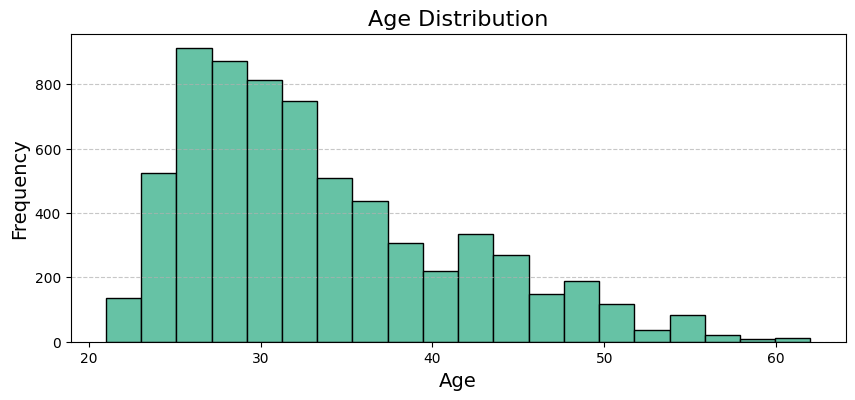

In [7]:
# Histogram to visualize the distribution of the 'Age' column
plt.figure(figsize=(10, 4))
plt.hist(dataset['Age'], bins=20, color='#66C2A5', edgecolor='black')
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

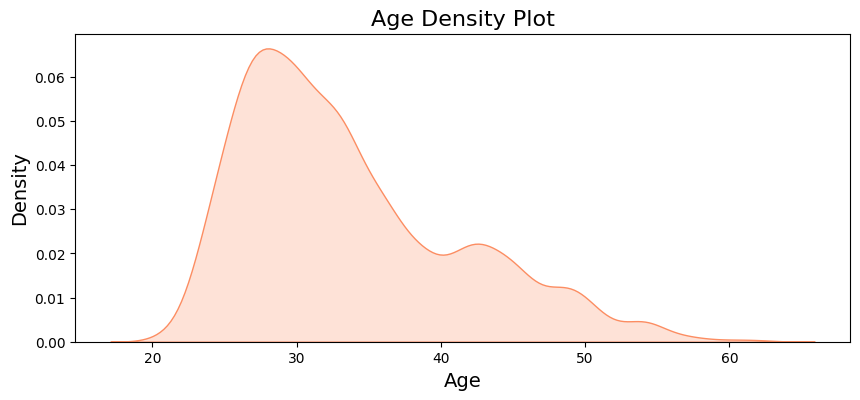

In [8]:
#Age Density Visualization
plt.figure(figsize=(10, 4))
sns.kdeplot(dataset['Age'], fill=True, color='#FC8D62')
plt.title("Age Density Plot", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

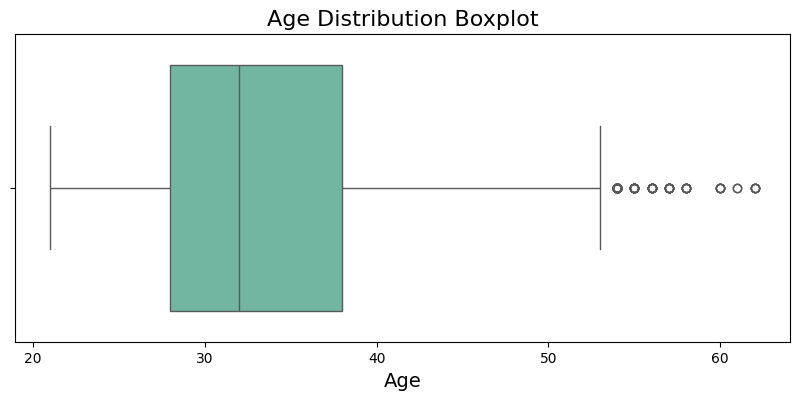

In [9]:
# Age Boxplot Overview
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Age'], color='#66C2A5')
plt.title("Age Distribution Boxplot", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.show()

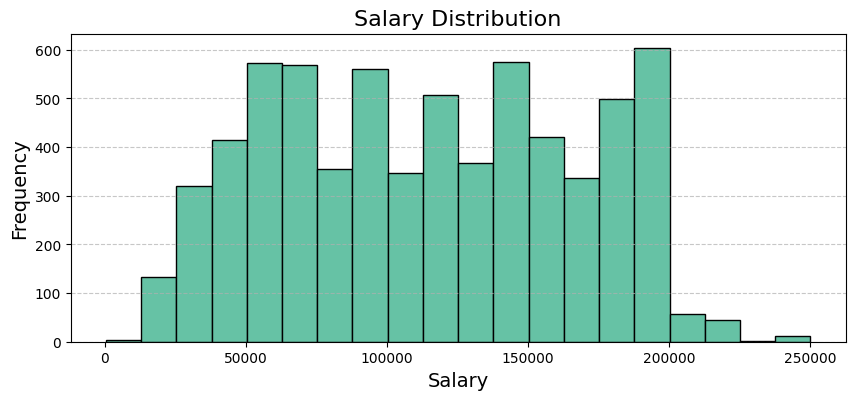

In [10]:
# Histogram to visualize the distribution of the 'Salary' column
plt.figure(figsize=(10, 4))
plt.hist(dataset['Salary'], bins=20, color='#66C2A5', edgecolor='black')
plt.title("Salary Distribution", fontsize=16)
plt.xlabel("Salary", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

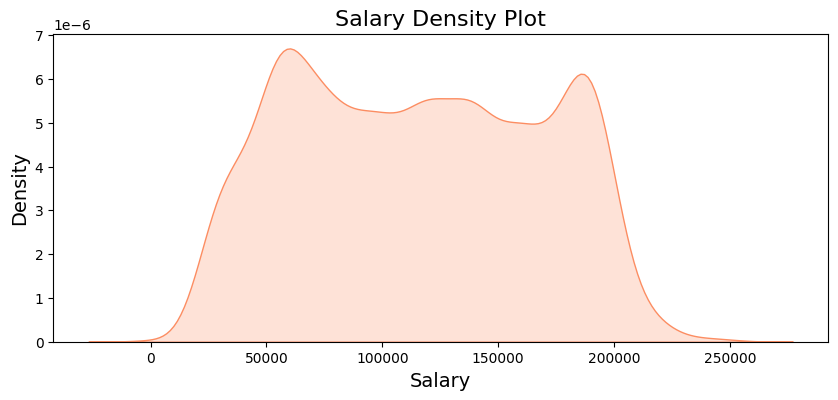

In [11]:
#Salary Density Visualization
plt.figure(figsize=(10, 4))
sns.kdeplot(dataset['Salary'], fill=True, color='#FC8D62')
plt.title("Salary Density Plot", fontsize=16)
plt.xlabel("Salary", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

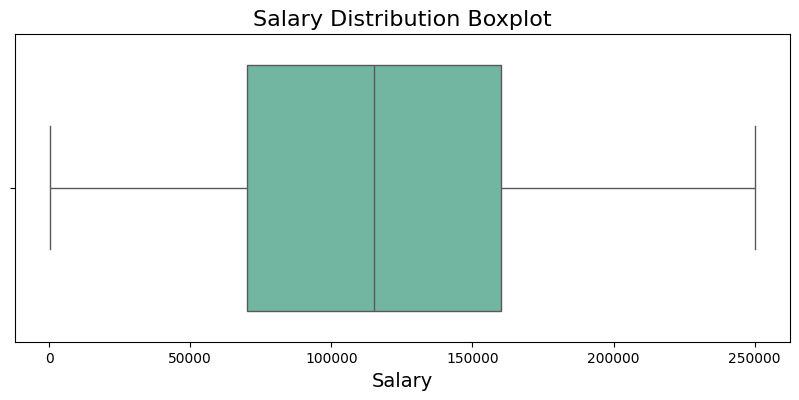

In [12]:
# Salary Boxplot Overview
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Salary'], color='#66C2A5')
plt.title("Salary Distribution Boxplot", fontsize=16)
plt.xlabel("Salary", fontsize=14)
plt.show()

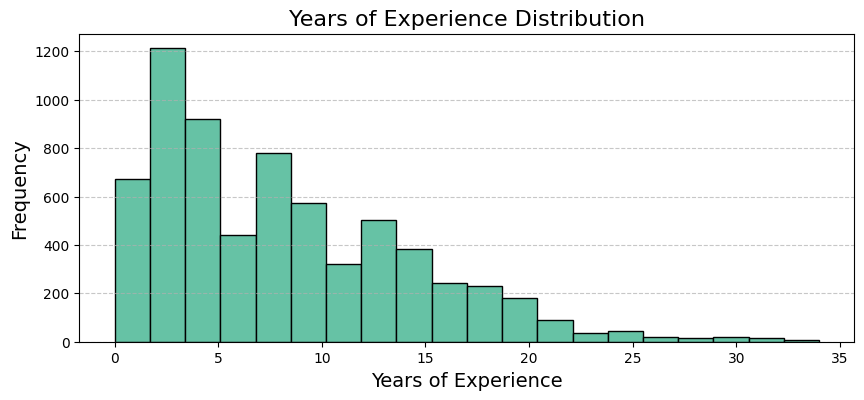

In [13]:
# Histogram to visualize the distribution of the 'Years of Experience' column
plt.figure(figsize=(10, 4))
plt.hist(dataset['Years of Experience'], bins=20, color='#66C2A5', edgecolor='black')
plt.title("Years of Experience Distribution", fontsize=16)
plt.xlabel("Years of Experience", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

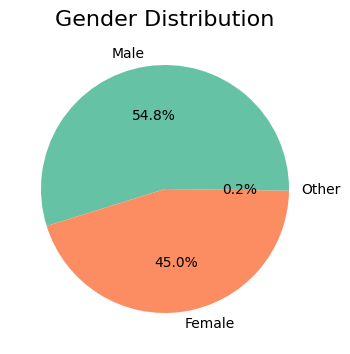

In [14]:
# Gender Distribution Visualization (Pie Chart)
plt.figure(figsize=(4, 8))
gender_counts = dataset['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66C2A5', '#FC8D62'])
plt.title("Gender Distribution", fontsize=16)
plt.show()

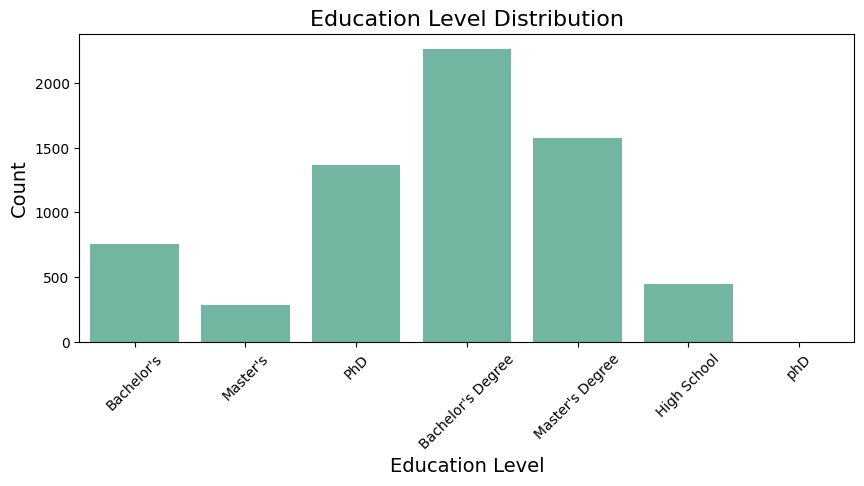

In [15]:
# Education Level Distribution (Bar Plot)
plt.figure(figsize=(10, 4))
sns.countplot(x='Education Level', data=dataset, color='#66C2A5')
plt.title("Education Level Distribution", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [16]:
#  missing values
print("----- Missing Values -----")
missing_values = dataset.isnull().sum()
print(missing_values[missing_values > 0])
print("--------------------------")

----- Missing Values -----
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64
--------------------------


In [17]:
#  duplicate values
print("----- Duplicate Values -----")
duplicate_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print("---------------------------")

----- Duplicate Values -----
Number of duplicate rows: 4912
---------------------------


In [18]:
#  dataset data types
print("----- Data Types -----")
print(dataset.dtypes)
print("----------------------")

print(dataset.info)

----- Data Types -----
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object
----------------------
<bound method DataFrame.info of        Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female

In [19]:
# Data Cleaning and Standardization of Job Titles and Education Levels

dataset['Job Title'] = dataset['Job Title'].replace('HR Manager', 'Human Resources Manager')
dataset['Job Title'] = dataset['Job Title'].replace('Director of Marketing', 'Marketing Director')
dataset['Job Title'] = dataset['Job Title'].replace('Customer Service Rep', 'Customer Service Representative')
dataset['Job Title'] = dataset['Job Title'].replace('Juniour HR Coordinator', ' Junior HR Coordinator')
dataset['Education Level'] = dataset['Education Level'].replace('phD', 'PhD')
dataset['Education Level'] = dataset['Education Level'].replace("Bachelor's", "Bachelor's Degree")
dataset['Education Level'] = dataset['Education Level'].replace("Master's", "Master's Degree")


In [20]:
# replace other by the mode of Gender
dataset['Gender'] = dataset['Gender'].replace('Other', dataset['Gender'].mode()[0]  )
print(dataset['Gender'].value_counts())

Gender
Male      3688
Female    3014
Name: count, dtype: int64


In [21]:
# Data Preparation: Handling Inconsistencies and Duplicates
import pandas as pd

print("----- Checking for Duplicates -----")
# Check duplicates
# dataset.duplicated().sum() # Already checked in a previous cell
# print(f"Duplicated values: {dataset.shape[0]}") # This prints the number of rows, not duplicates

# Drop duplicates
dataset = dataset.drop_duplicates()
print(f"Number of rows after dropping duplicate values: {dataset.duplicated().sum()}")

print("------------------------------------------------------")

# Missing values

# Numerical Data: fill with median
numerical_cols = dataset.select_dtypes(include=np.number).columns
for col in numerical_cols:
    dataset[col].fillna(dataset[col].median(), inplace=True)

# Categorical Data: fill with mode
categorical_cols = dataset.select_dtypes(include='object').columns
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

print("----- Checking for Missing Values -----")
print(dataset.isnull().sum())

print("------------------------------------------------------")

# Replace low-frequency job titles with 'Other'
threshold = 11  # Frequency threshold
value_counts = dataset['Job Title'].value_counts()
print(f"Frequency of each job title: {value_counts}")

# Apply the transformation
dataset.loc[:, 'Job Title'] = dataset['Job Title'].apply(
    lambda x: x if value_counts[x] >= threshold else 'Other'
)

print("------------------------------------------------------")
# Function to remove outliers
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Remove outliers from specific columns
dataset.loc[:, 'Age'] = remove_outliers(dataset['Age'])
dataset.loc[:, 'Salary'] = remove_outliers(dataset['Salary'])
dataset.loc[:, 'Years of Experience'] = remove_outliers(dataset['Years of Experience'])

print("----- Dataset after outlier removal -----")
print(dataset.head())
print("Columns after cleaning:", dataset.columns) # Add this line to check columns

----- Checking for Duplicates -----
Number of rows after dropping duplicate values: 0
------------------------------------------------------
----- Checking for Missing Values -----
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64
------------------------------------------------------
Frequency of each job title: Job Title
Software Engineer Manager    128
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Senior IT Consultant           1
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Name: count, Length: 190, dtype: int64
------------------------------------------------------
----- Dataset after outlier removal -----
    Age  Gender    Education Level          Job Title  Years of

/tmp/ipython-input-21-1198616629.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
/tmp/ipython-input-21-1198616629.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col].fillna(dataset[col].median(), inplace=True)
/tmp/ipython-input-21-1198616629.py:25: FutureWarning: A va

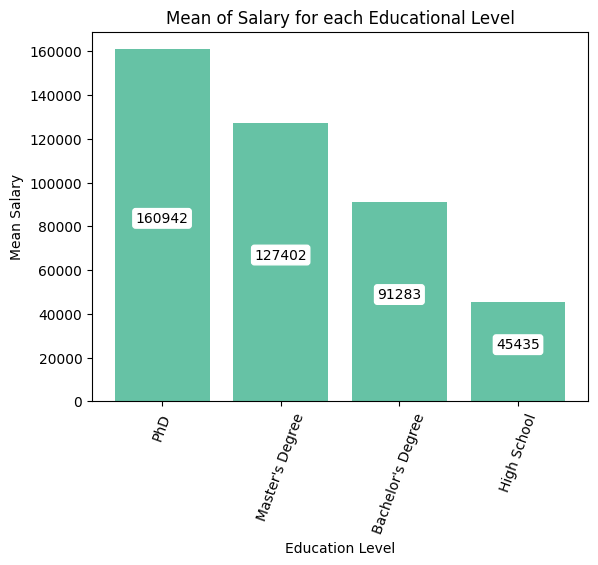

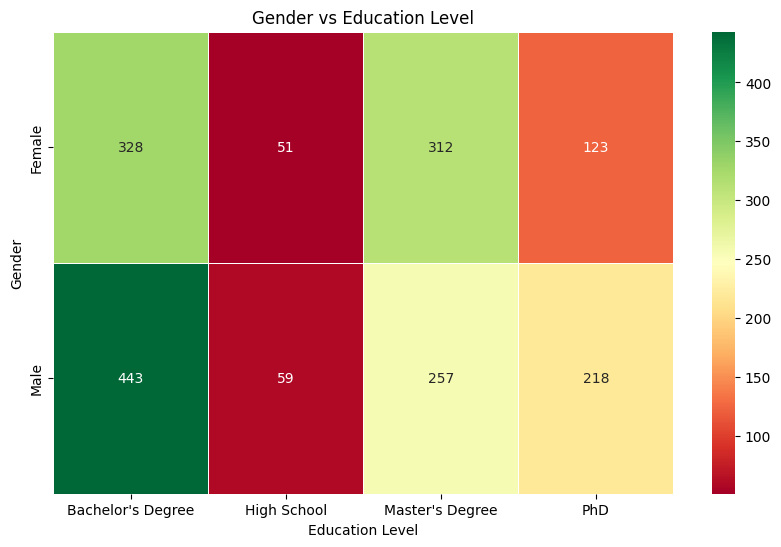

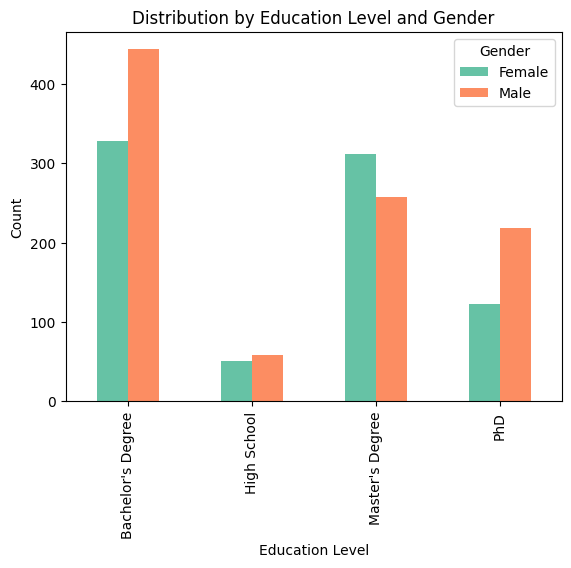

In [22]:
#Mean of Salary for each Educational Level
ES = dataset.groupby('Education Level').agg({'Salary': lambda x: x.mean()}).reset_index()
ES = ES.sort_values(by='Salary', ascending=False)
bars = plt.bar(ES['Education Level'], ES['Salary'], color='#66C2A5')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.title('Mean of Salary for each Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.xticks(rotation=70)
plt.show()

#
crosstab = pd.crosstab(dataset['Gender'], dataset['Education Level'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='RdYlGn', linewidths=.5)
plt.title('Gender vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Gender')
plt.show()

#Distribution by Education Level and Gender
crosstab_result = pd.crosstab(dataset['Education Level'], dataset['Gender'])
ax = crosstab_result.plot(kind='bar', color=['#66C2A5', '#FC8D62'])
ax.set_title('Distribution by Education Level and Gender')
ax.set_ylabel('Count')
plt.show()

In [23]:
# Apply One-Hot Encoding on 'Job Title' column
from sklearn.preprocessing import LabelEncoder
print("Columns in dataset:", dataset.columns) # Add this line to check columns
one_hot_encoded = pd.get_dummies(dataset['Job Title'], prefix='Job_Title')
# Drop the original 'Job Title' column from the dataset
# dataset = dataset.drop(columns=['Job Title']) # This line is no longer needed
# Merge the original dataset (without 'Job Title') with the one-hot encoded columns
dataset_encoded = pd.concat([dataset, one_hot_encoded], axis=1)
# Apply Label Encoding to 'Education Level' and 'Gender' columns
dataset_encoded['Education Level'] = LabelEncoder().fit_transform(dataset_encoded['Education Level'])
dataset_encoded['Gender'] = LabelEncoder().fit_transform(dataset_encoded['Gender'])
# Ensure that 'Salary' column is the last column in the dataset
# Get all columns except 'Salary'
cols = [col for col in dataset_encoded.columns if col != 'Salary']
# Reorder the columns with 'Salary' at the end
dataset_encoded = dataset_encoded[cols + ['Salary']]
display(dataset_encoded.head())

Columns in dataset: Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


,Age,Gender,Education Level,Job Title,Years of Experience,Job_Title_Back end Developer,Job_Title_Content Marketing Manager,Job_Title_Data Analyst,Job_Title_Data Scientist,Job_Title_Digital Marketing Manager,...,Job_Title_Senior HR Generalist,Job_Title_Senior Human Resources Manager,Job_Title_Senior Product Marketing Manager,Job_Title_Senior Project Engineer,Job_Title_Senior Software Engineer,Job_Title_Software Developer,Job_Title_Software Engineer,Job_Title_Software Engineer Manager,Job_Title_Web Developer,Salary
0,32.0,1,0,Software Engineer,5.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,90000.0
1,28.0,0,2,Data Analyst,3.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,65000.0
2,45.0,1,3,Other,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,150000.0
3,36.0,0,0,Sales Associate,7.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,60000.0
4,52.0,1,2,Other,20.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,200000.0


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load Data (assuming dataset is already loaded in a previous cell)
dataset = pd.read_csv("Salary_Data[1].csv") # Load dataset explicitly in this cell

print("----- Original Dataset Head -----")
display(dataset.head())
print("------------------------------------------------------")

print("----- Checking for Duplicates -----")
# Drop duplicates
dataset = dataset.drop_duplicates()
print(f"Number of rows after dropping duplicate values: {dataset.duplicated().sum()}")
print("------------------------------------------------------")

print("----- Checking for Missing Values (Before Imputation) -----")
print(dataset.isnull().sum())
print("------------------------------------------------------")

# Missing values imputation
# Numerical Data: fill with median
numerical_cols = dataset.select_dtypes(include=np.number).columns
for col in numerical_cols:
    dataset[col].fillna(dataset[col].median(), inplace=True)

# Categorical Data: fill with mode
categorical_cols = dataset.select_dtypes(include='object').columns
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

print("----- Checking for Missing Values (After Imputation) -----")
print(dataset.isnull().sum())
print("------------------------------------------------------")

# Replace low-frequency job titles with 'Other'
threshold = 11  # Frequency threshold
value_counts = dataset['Job Title'].value_counts()
print(f"Frequency of each job title: {value_counts}")

# Apply the transformation
dataset.loc[:, 'Job Title'] = dataset['Job Title'].apply(
    lambda x: x if value_counts[x] >= threshold else 'Other'
)
print("----- Job Title counts after grouping low frequency titles -----")
print(dataset['Job Title'].value_counts())
print("------------------------------------------------------")


# Function to remove outliers
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Remove outliers from specific columns
dataset.loc[:, 'Age'] = remove_outliers(dataset['Age'])
dataset.loc[:, 'Salary'] = remove_outliers(dataset['Salary'])
dataset.loc[:, 'Years of Experience'] = remove_outliers(dataset['Years of Experience'])

print("----- Dataset head after outlier removal -----")
display(dataset.head())
print("------------------------------------------------------")


# Data Encoding
print("----- Columns before encoding -----")
print(dataset.columns)
print("------------------------------------------------------")

# Apply One-Hot Encoding on 'Job Title' column
one_hot_encoded_job = pd.get_dummies(dataset['Job Title'], prefix='Job_Title')

# Apply Label Encoding to 'Education Level' and 'Gender' columns
label_encoded_edu = LabelEncoder().fit_transform(dataset['Education Level'])
label_encoded_gender = LabelEncoder().fit_transform(dataset['Gender'])

# Create a new DataFrame with the encoded columns and other numerical columns
dataset_encoded = dataset[['Age', 'Years of Experience', 'Salary']].copy()
dataset_encoded['Education Level'] = label_encoded_edu
dataset_encoded['Gender'] = label_encoded_gender

# Concatenate the one-hot encoded Job Title columns
dataset_encoded = pd.concat([dataset_encoded, one_hot_encoded_job], axis=1)


# Ensure that 'Salary' column is the last column in the dataset
# Get all columns except 'Salary'
cols = [col for col in dataset_encoded.columns if col != 'Salary']
# Reorder the columns with 'Salary' at the end
dataset_encoded = dataset_encoded[cols + ['Salary']]

print("----- Encoded Dataset Head -----")
display(dataset_encoded.head())
print("----- Columns after encoding -----")
print(dataset_encoded.columns)
print("------------------------------------------------------")

----- Original Dataset Head -----


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


------------------------------------------------------
----- Checking for Duplicates -----
Number of rows after dropping duplicate values: 0
------------------------------------------------------
----- Checking for Missing Values (Before Imputation) -----
Age                    1
Gender                 1
Education Level        2
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64
------------------------------------------------------
----- Checking for Missing Values (After Imputation) -----
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64
------------------------------------------------------
Frequency of each job title: Job Title
Software Engineer Manager         128
Full Stack Engineer               123
Senior Software Engineer           96
Senior Project Engineer            95
Back end Developer                 81
                    

/tmp/ipython-input-24-1353734318.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
/tmp/ipython-input-24-1353734318.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Other,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Other,20.0,200000.0


------------------------------------------------------
----- Columns before encoding -----
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
------------------------------------------------------
----- Encoded Dataset Head -----


,Age,Years of Experience,Education Level,Gender,Job_Title_Back end Developer,Job_Title_Content Marketing Manager,Job_Title_Data Analyst,Job_Title_Data Scientist,Job_Title_Digital Marketing Manager,Job_Title_Director of HR,...,Job_Title_Senior HR Generalist,Job_Title_Senior Human Resources Manager,Job_Title_Senior Product Marketing Manager,Job_Title_Senior Project Engineer,Job_Title_Senior Software Engineer,Job_Title_Software Developer,Job_Title_Software Engineer,Job_Title_Software Engineer Manager,Job_Title_Web Developer,Salary
0,32.0,5.0,0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,90000.0
1,28.0,3.0,3,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,65000.0
2,45.0,15.0,5,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,150000.0
3,36.0,7.0,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,60000.0
4,52.0,20.0,3,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,200000.0


----- Columns after encoding -----
Index(['Age', 'Years of Experience', 'Education Level', 'Gender',
       'Job_Title_Back end Developer', 'Job_Title_Content Marketing Manager',
       'Job_Title_Data Analyst', 'Job_Title_Data Scientist',
       'Job_Title_Digital Marketing Manager', 'Job_Title_Director of HR',
       'Job_Title_Director of Marketing', 'Job_Title_Financial Analyst',
       'Job_Title_Financial Manager', 'Job_Title_Front end Developer',
       'Job_Title_Full Stack Engineer',
       'Job_Title_Human Resources Coordinator',
       'Job_Title_Human Resources Manager', 'Job_Title_Junior HR Coordinator',
       'Job_Title_Junior HR Generalist', 'Job_Title_Junior Sales Associate',
       'Job_Title_Junior Sales Representative',
       'Job_Title_Junior Web Developer', 'Job_Title_Marketing Analyst',
       'Job_Title_Marketing Coordinator', 'Job_Title_Marketing Manager',
       'Job_Title_Operations Manager', 'Job_Title_Other',
       'Job_Title_Product Manager', 'Job_Title_

In [25]:
# data split and scaling
from sklearn.model_selection import train_test_split
X = dataset_encoded.iloc[:, :-1].values
Y = dataset_encoded.iloc[:,-1].values
X = X.astype(np.float64)
Y = Y.astype(np.float64)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(f"X_train : {X_train.shape}")
print(f"Y_train : {Y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"Y_test : {Y_test.shape}")

  # Scaling [standing scaling]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
Standared_X_train=scaler.transform(X_train)
Standared_X_test=scaler.transform(X_test)

X_train : (1433, 44)
Y_train : (1433,)
X_test : (359, 44)
Y_test : (359,)


Linear Regression : RMSE: 21568.74925303645
Linear Regression : MSE: 465210944.3403605
Linear Regression : MAE: 15698.724041459947
Linear Regression : R²: 0.8279491327449576
--------------------------------------------------------------------------


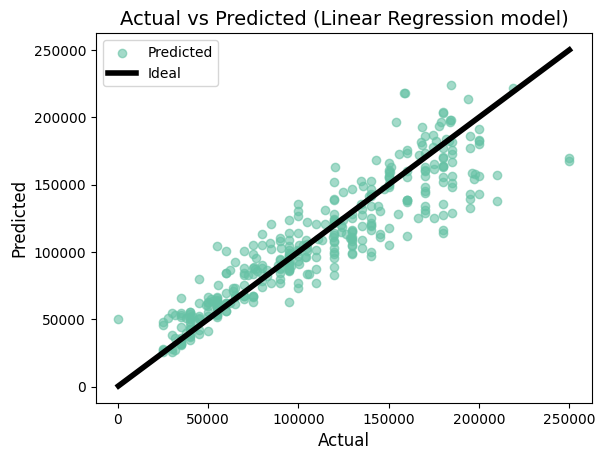

--------------------------------------------------------------------------


Actual Value,Predicted Value,Absolute Error
60000.000000,100556.219019,40556.219019
140000.000000,119708.998301,20291.001699
55538.000000,75658.987809,20120.987809
70000.000000,84123.242985,14123.242985
100000.000000,114114.902610,14114.902610


In [26]:
# linear regression model
mymodel=LinearRegression()
mymodel.fit(Standared_X_train,Y_train)
Y_predict_Linear_regression=mymodel.predict(Standared_X_test)

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score,accuracy_score
mean_absolute_error(Y_test,Y_predict_Linear_regression)
mean_squared_error(Y_test,Y_predict_Linear_regression)
r2_score(Y_test,Y_predict_Linear_regression)
np.sqrt(mean_squared_error(Y_test, Y_predict_Linear_regression))

print(f"Linear Regression : RMSE: {np.sqrt(mean_squared_error(Y_test, Y_predict_Linear_regression))}")
print(f"Linear Regression : MSE: {mean_squared_error(Y_test,Y_predict_Linear_regression)}")
print(f"Linear Regression : MAE: {mean_absolute_error(Y_test,Y_predict_Linear_regression)}")
print(f"Linear Regression : R²: {r2_score(Y_test,Y_predict_Linear_regression)}")
print("--------------------------------------------------------------------------")
plt.scatter(Y_test, Y_predict_Linear_regression, color='#66C2A5', label='Predicted', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', lw=4, label='Ideal')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted (Linear Regression model)', fontsize=14)
plt.legend()
plt.show()
print("--------------------------------------------------------------------------")
#Linear Regression
comparison_table = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_predict_Linear_regression,
    'Absolute Error': np.abs(np.array(Y_test) - np.array( Y_predict_Linear_regression))
})

styled_table = (
    comparison_table.head(5).style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Comparison of Actual and Predicted Values")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '18px'), ('font-weight', 'bold')]}
        ]
    )
    .hide(axis="index")
)

styled_table


Decision Tree: RMSE: 19865.598072773053
Decision Tree: MSE: 394641986.7889644
Decision Tree: MAE: 12824.821663365869
Decision Tree: R²: 0.8540479390944467
---------------------------------------------------------------


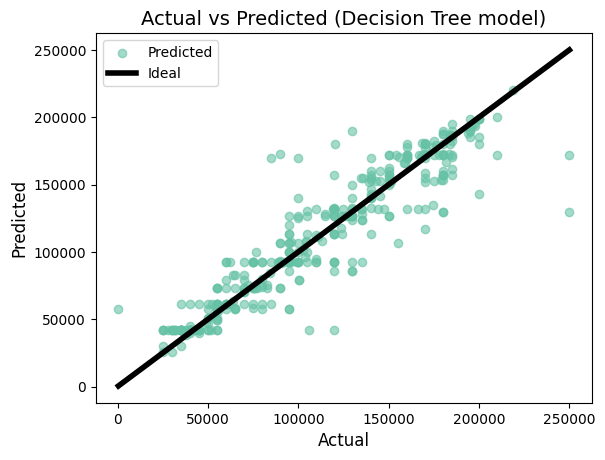

---------------------------------------------------------------


Actual Value,Predicted Value,Absolute Error
60000.000000,61293.928571,1293.928571
140000.000000,132500.000000,7500.000000
55538.000000,56296.555556,758.555556
70000.000000,70000.000000,0.000000
100000.000000,106875.000000,6875.000000


In [27]:
# Decision Tree model

dt_model = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dt_model.fit(Standared_X_train,Y_train)
Y_predict_Decision_Tree= dt_model.predict(Standared_X_test)

mean_squared_error(Y_test,Y_predict_Decision_Tree)
mean_absolute_error(Y_test,Y_predict_Decision_Tree)
np.sqrt(mean_squared_error(Y_test,Y_predict_Decision_Tree ))
dt_model.score(Standared_X_test,Y_test)
print(f"Decision Tree: RMSE: {np.sqrt(mean_squared_error(Y_test,Y_predict_Decision_Tree ))}")
print(f"Decision Tree: MSE: {mean_squared_error(Y_test,Y_predict_Decision_Tree)}")
print(f"Decision Tree: MAE: {mean_absolute_error(Y_test,Y_predict_Decision_Tree)}")
print(f"Decision Tree: R²: {dt_model.score(Standared_X_test,Y_test)}")
print("---------------------------------------------------------------")


plt.scatter(Y_test,Y_predict_Decision_Tree , color='#66C2A5', label='Predicted', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', lw=4, label='Ideal')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted (Decision Tree model)', fontsize=14)
plt.legend()
plt.show()
print("---------------------------------------------------------------")

#Decision tree
comparison_table = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_predict_Decision_Tree,
    'Absolute Error': np.abs(np.array(Y_test) - np.array( Y_predict_Decision_Tree))
})

styled_table = (
    comparison_table.head(5).style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Comparison of Actual and Predicted Values")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '18px'), ('font-weight', 'bold')]}
        ]
    )
    .hide(axis="index")
)

styled_table




Decision Tree: RMSE: 19865.598072773053
Decision Tree: MSE: 394641986.7889644
Decision Tree: MAE: 12824.821663365869
Decision Tree: R²: 0.8540479390944467
---------------------------------------------------------------


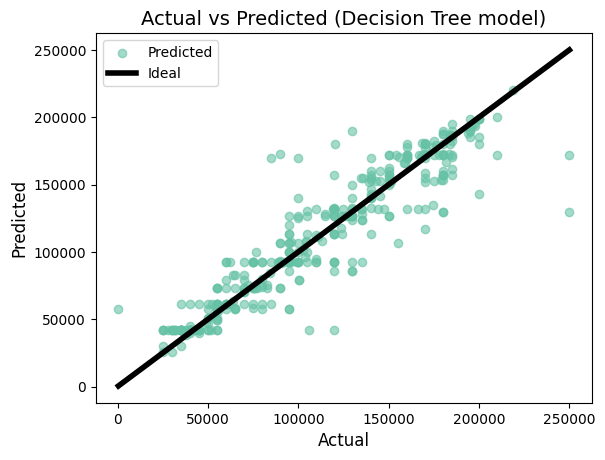

---------------------------------------------------------------


Actual Value,Predicted Value,Absolute Error
60000.000000,61293.928571,1293.928571
140000.000000,132500.000000,7500.000000
55538.000000,56296.555556,758.555556
70000.000000,70000.000000,0.000000
100000.000000,106875.000000,6875.000000


In [28]:
# Decision Tree model

dt_model = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dt_model.fit(Standared_X_train,Y_train)
Y_predict_Decision_Tree= dt_model.predict(Standared_X_test)

mean_squared_error(Y_test,Y_predict_Decision_Tree)
mean_absolute_error(Y_test,Y_predict_Decision_Tree)
np.sqrt(mean_squared_error(Y_test,Y_predict_Decision_Tree ))
dt_model.score(Standared_X_test,Y_test)
print(f"Decision Tree: RMSE: {np.sqrt(mean_squared_error(Y_test,Y_predict_Decision_Tree ))}")
print(f"Decision Tree: MSE: {mean_squared_error(Y_test,Y_predict_Decision_Tree)}")
print(f"Decision Tree: MAE: {mean_absolute_error(Y_test,Y_predict_Decision_Tree)}")
print(f"Decision Tree: R²: {dt_model.score(Standared_X_test,Y_test)}")
print("---------------------------------------------------------------")


plt.scatter(Y_test,Y_predict_Decision_Tree , color='#66C2A5', label='Predicted', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', lw=4, label='Ideal')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted (Decision Tree model)', fontsize=14)
plt.legend()
plt.show()
print("---------------------------------------------------------------")

#Decision tree
comparison_table = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_predict_Decision_Tree,
    'Absolute Error': np.abs(np.array(Y_test) - np.array( Y_predict_Decision_Tree))
})

styled_table = (
    comparison_table.head(5).style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Comparison of Actual and Predicted Values")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '18px'), ('font-weight', 'bold')]}
        ]
    )
    .hide(axis="index")
)

styled_table




Model saved successfully as model.pkl
Random Forest: RMSE: 17011.627156746566
Random Forest: MSE: 289395458.5201572
Random Forest: MAE: 10936.903566770972
Random Forest: R²: 0.8929716933279294
----------------------------------------------------------------------------


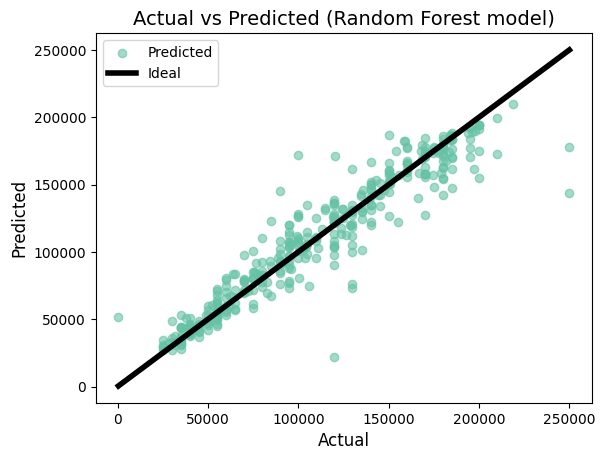

----------------------------------------------------------------------------


Actual Value,Predicted Value,Absolute Error
60000.000000,79017.261905,19017.261905
140000.000000,130824.600000,9175.400000
55538.000000,55198.954167,339.045833
70000.000000,70024.900000,24.900000
100000.000000,108500.000000,8500.000000


In [29]:
# Random Forest model
import joblib # Import joblib
import pandas as pd # Import pandas
import numpy as np # Import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for plotting
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import metric functions


# Data Loading and Preprocessing (copied from cell 1e176564)
dataset = pd.read_csv("Salary_Data[1].csv")

# Drop duplicates
dataset = dataset.drop_duplicates().copy()

# Fill missing values
numerical_cols = dataset.select_dtypes(include=np.number).columns
for col in numerical_cols:
    dataset[col] = dataset[col].fillna(dataset[col].median())

categorical_cols = dataset.select_dtypes(include='object').columns
for col in categorical_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

# Replace low-frequency job titles with 'Other' (using the same threshold as before)
threshold = 11
value_counts = dataset['Job Title'].value_counts()
dataset['Job Title'] = dataset['Job Title'].apply(
    lambda x: x if x in value_counts.index and value_counts[x] >= threshold else 'Other'
)

# Function to remove outliers (copied from cell 1e176564)
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Remove outliers from specific columns
dataset['Age'] = remove_outliers(dataset['Age'])
dataset['Salary'] = remove_outliers(dataset['Salary'])
dataset['Years of Experience'] = remove_outliers(dataset['Years of Experience'])


# Data Encoding (copied from cell 1e176564)

# Apply One-Hot Encoding on 'Job Title' column
one_hot_encoded_job = pd.get_dummies(dataset['Job Title'], prefix='Job_Title')

# Apply Label Encoding to 'Education Level' and 'Gender' columns
label_encoded_edu = LabelEncoder().fit_transform(dataset['Education Level'])
label_encoded_gender = LabelEncoder().fit_transform(dataset['Gender'])

# Create a new DataFrame with the encoded columns and other numerical columns
dataset_encoded = dataset[['Age', 'Years of Experience', 'Salary']].copy()
dataset_encoded['Education Level'] = label_encoded_edu
dataset_encoded['Gender'] = label_encoded_gender

# Concatenate the one-hot encoded Job Title columns
dataset_encoded = pd.concat([dataset_encoded.reset_index(drop=True), one_hot_encoded_job.reset_index(drop=True)], axis=1)

# Ensure that 'Salary' column is the last column in the dataset
# Get all columns except 'Salary'
cols = [col for col in dataset_encoded.columns if col != 'Salary']
# Reorder the columns with 'Salary' at the end
dataset_encoded = dataset_encoded[cols + ['Salary']]


# Data split and scaling (copied from cell I1X9QoxqtHBf)
X = dataset_encoded.iloc[:, :-1].values
Y = dataset_encoded.iloc[:,-1].values
X = X.astype(np.float64)
Y = Y.astype(np.float64)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Scaling [standing scaling]
scaler=StandardScaler().fit(X_train)
Standared_X_train=scaler.transform(X_train)
Standared_X_test=scaler.transform(X_test)


# Train the Random Forest model (copied from cell kI8QyKFjuux9)
rf_model = RandomForestRegressor(n_estimators=20)
rf_model.fit(Standared_X_train,Y_train)

# Save the trained model
joblib.dump(rf_model, 'model.pkl')
print("Model saved successfully as model.pkl")


# Evaluate the model
Y_predict_Random_Forest = rf_model.predict(Standared_X_test)

print(f"Random Forest: RMSE: {np.sqrt(mean_squared_error(Y_test, Y_predict_Random_Forest))}")
print(f"Random Forest: MSE: {mean_squared_error(Y_test,Y_predict_Random_Forest)}")
print(f"Random Forest: MAE: {mean_absolute_error(Y_test,Y_predict_Random_Forest)}")
print(f"Random Forest: R²: {rf_model.score(Standared_X_test,Y_test)}")
print("----------------------------------------------------------------------------")

# Plot Actual vs Predicted
plt.scatter(Y_test, Y_predict_Random_Forest, color='#66C2A5', label='Predicted', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', lw=4, label='Ideal')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted (Random Forest model)', fontsize=14)
plt.legend()
plt.show()
print("----------------------------------------------------------------------------")

# Comparison table
comparison_table = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_predict_Random_Forest,
    'Absolute Error': np.abs(np.array(Y_test) - np.array(Y_predict_Random_Forest))
})

styled_table = (
    comparison_table.head(5).style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Comparison of Actual and Predicted Values")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '18px'), ('font-weight', 'bold')]}
        ]
    )
    .hide(axis="index")
)

styled_table

In [30]:

# Comparison between Regression, Decision Tree, and Random Forest
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assuming `Y_test` and the predicted results are defined
models = {
    "Random Forest": Y_predict_Random_Forest,
    "Decision Tree": Y_predict_Decision_Tree,
    "Linear Regression": Y_predict_Linear_regression,
}

# Initialize the metrics dictionary
metrics = {"Model": [], "R²": [], "MAE": [], "MSE": [], "RMSE": []}

# Calculate metrics for each model
for model_name, y_pred in models.items():
    metrics["Model"].append(model_name)
    metrics["R²"].append(r2_score(Y_test, y_pred))
    metrics["MAE"].append(mean_absolute_error(Y_test, y_pred))
    metrics["MSE"].append(mean_squared_error(Y_test, y_pred))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(Y_test, y_pred)))

# Create a DataFrame to display the metrics
df = pd.DataFrame(metrics)

# Style the DataFrame for better presentation
styled_df = (
    df.style
    .set_table_attributes('class="table table-bordered"')
    .set_caption("Model Performance Metrics")
    .set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', '#66C2A5'), ('color', 'white'), ('text-align', 'center')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('width', '100%'), ('border-collapse', 'collapse')]}
        ]
    )
    .hide(axis="index")  # Hide the index for a cleaner look
)

styled_df


Model,R²,MAE,MSE,RMSE
Random Forest,0.892972,10936.903567,289395458.520157,17011.627157
Decision Tree,0.854048,12824.821663,394641986.788964,19865.598073
Linear Regression,0.827949,15698.724041,465210944.340361,21568.749253


In [31]:
%pip install streamlit

In [60]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("Salary_Data[1].csv")

# 🧹 Drop rows where Salary is missing
df = df.dropna(subset=['Salary'])

# Features and Target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Column types
categorical = X.select_dtypes(include='object').columns.tolist()
numerical = X.select_dtypes(exclude='object').columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "salary_model.joblib")
print("✅ Model trained and saved as salary_model.joblib")


✅ Model trained and saved as salary_model.joblib


In [63]:
!pip install -q streamlit pyngrok


In [70]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

# Load trained model
model = joblib.load("salary_model.joblib")

st.title("💼 Employee Salary Prediction App")

# 📝 Input form
education = st.selectbox("Education", ["High School", "Bachelor", "Master", "PhD"])
experience = st.number_input("Years of Experience", min_value=0.0, step=0.1)
location = st.selectbox("Location", ["New York", "San Francisco", "Los Angeles", "Chicago"])
job_title = st.selectbox("Job Title", ["Data Scientist", "Software Engineer", "Analyst"])
age = st.number_input("Age", min_value=18, max_value=65, step=1)
gender = st.selectbox("Gender", ["Male", "Female", "Other"])

# 🔍 Predict
if st.button("Predict Salary"):
    input_data = {
    "Age": [age],
    "Gender": [gender],
    "Education Level": [education],
    "Job Title": [job_title],
    "Years of Experience": [experience]
}


    input_df = pd.DataFrame(input_data)

    # Predict
    prediction = model.predict(input_df)[0]
    st.success(f"💰 Predicted Salary: ${prediction:,.2f}")


Overwriting app.py


In [72]:
# Run Streamlit with ngrok tunnel
import subprocess
import threading
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Function to run streamlit
def run():
    subprocess.run(["streamlit", "run", "app.py"])

# Start streamlit in a thread
thread = threading.Thread(target=run)
thread.start()

# Open ngrok tunnel on port 8501
public_url = ngrok.connect(8501)
print("🔗 Streamlit app running at:", public_url)


🔗 Streamlit app running at: NgrokTunnel: "https://1b91d3ece2a8.ngrok-free.app" -> "http://localhost:8501"
